# Correlation and T-Test

First step is to setup the the needed environment. This contains the steps of importing the needed libraries and set the correct working directory.

In [ ]:
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.core.pylabtools import figsize
from numpy import exp
from scipy.stats import boxcox

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/Social_Interactions')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Social_Interactions'

# Data Load

In [ ]:
df_CVP = pd.read_csv('Data/df_CVP.csv', on_bad_lines='skip')
df_closeness_CVP = pd.read_csv('Data/closeness_CVP.csv')

df_SVP = pd.read_csv('Data/df_SVP.csv', on_bad_lines='skip')
df_closeness_SVP = pd.read_csv('Data/closeness_SVP.csv')

df_SP = pd.read_csv('Data/df_SP.csv', on_bad_lines='skip')
df_closeness_SP = pd.read_csv('Data/closeness_SP.csv')

df_closeness_left = pd.read_csv('Data/closeness_left.csv')

df_closeness_right = pd.read_csv('Data/closeness_right.csv')

# First Look at Data Structure

To get a short overview we show you the loaded Dataframes of the 'CVP'.

In [ ]:
df_CVP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91494 entries, 0 to 91493
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   91494 non-null  int64 
 1   AffairShortId                91494 non-null  int64 
 2   AffairTitle                  91494 non-null  object
 3   VoteRegistrationNumber       91494 non-null  int64 
 4   VoteDate                     91494 non-null  object
 5   VoteMeaningYes               91129 non-null  object
 6   VoteMeaningNo                91217 non-null  object
 7   DivisionText                 91494 non-null  object
 8   VoteSubmissionText           62542 non-null  object
 9   VoteFilteredYes              91494 non-null  int64 
 10  VoteFilteredNo               91494 non-null  int64 
 11  VoteFilteredAbstain          91494 non-null  int64 
 12  VoteFilteredNotParticipated  91494 non-null  int64 
 13  VoteFilteredExcused          91

In [ ]:
df_CVP.head(1)

,Unnamed: 0,AffairShortId,AffairTitle,VoteRegistrationNumber,VoteDate,VoteMeaningYes,VoteMeaningNo,DivisionText,VoteSubmissionText,VoteFilteredYes,...,CouncillorName,CouncillorYes,CouncillorNo,CouncillorAbstain,CouncillorNotParticipated,CouncillorExcused,CouncillorPresident,Partei,not_reelected,reelected
0,13,20193033,Offensive zur Stärkung des Wirtschaftsstandort...,19593,Thu Sep 26 2019 20:05:17 GMT+0200 (Mitteleurop...,Accettare la mozione,Respingere la mozione,Ja,NaN,121,...,Glanzmann-Hunkeler Ida,1,0,0,0,0,0,CVP,0,1


In [ ]:
df_closeness_CVP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CouncillorId          23 non-null     int64  
 1   Closeness_Centrality  23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [ ]:
df_closeness_CVP.head()

,CouncillorId,Closeness_Centrality
0,4096,0.001792
1,4097,0.001777
2,4225,0.003407
3,4101,0.001771
4,4118,0.001748


# Data Preparation for Correlation Analysis

In [ ]:
#Function to prepare Data
def data_preparator_correlation(df_election, df_closeness):
  df_use = df_election[['CouncillorId', 'not_reelected', 'reelected']]

  df_use_use = pd.DataFrame(columns=['CouncillorId', 'not_reelected', 'reelected'])

  for i in df_use.index:
    x = pd.DataFrame(df_use.iloc[i]).T
    if int(x['CouncillorId']) in list(df_use_use['CouncillorId']):
      next
    else:
      df_use_use = df_use_use.append(x)
  
  df_use_use = df_use_use.reset_index()

  df_closeness.rename(columns={'Unnamed: 0': 'CouncillorId'},inplace=True)

  df_correlation = df_use_use.merge(df_closeness, how='inner', on='CouncillorId')

  df_correlation = df_correlation.drop(['index'], axis=1)

  return df_correlation
  

In [ ]:
df_correlation_CVP = data_preparator_correlation(df_CVP, df_closeness_CVP)
df_correlation_SVP = data_preparator_correlation(df_SVP, df_closeness_SVP)
df_correlation_SP = data_preparator_correlation(df_SP, df_closeness_SP)

In [ ]:
df_correlation_CVP.head(1)

,CouncillorId,not_reelected,reelected,Closeness_Centrality
0,1337,0,1,0.001874


In [ ]:
df_correlation_SVP.head(1)

,CouncillorId,not_reelected,reelected,Closeness_Centrality
0,3883,1,0,0.001315


In [ ]:
df_correlation_SP.head(1)

,CouncillorId,not_reelected,reelected,Closeness_Centrality
0,3923,0,1,0.002069


#Calculate Spearman-Correlation

H0: There is no association between the two variables
HA: There is a association between the two variables

In [309]:
def pearson_correlation_calc(df):
  x = list(df['not_reelected'])
  y = list(df['Closeness_Centrality'])
  sp_cor = scipy.stats.pearsonr(x,y)
  return sp_cor

In [310]:
print("pearson correalation CVP: ", pearson_correlation_calc(df_correlation_CVP))

pearson correalation CVP:  (-0.1407593196262857, 0.5217733675167404)


In [311]:
print("pearson correalation SVP: ",pearson_correlation_calc(df_correlation_SVP))

pearson correalation SVP:  (-0.09382437614072714, 0.4956542750893363)


In [312]:
print("pearson correalation SP: ",pearson_correlation_calc(df_correlation_SP))

pearson correalation SP:  (-0.01449909732343213, 0.9351354649336318)


<Figure size 1440x144 with 0 Axes>

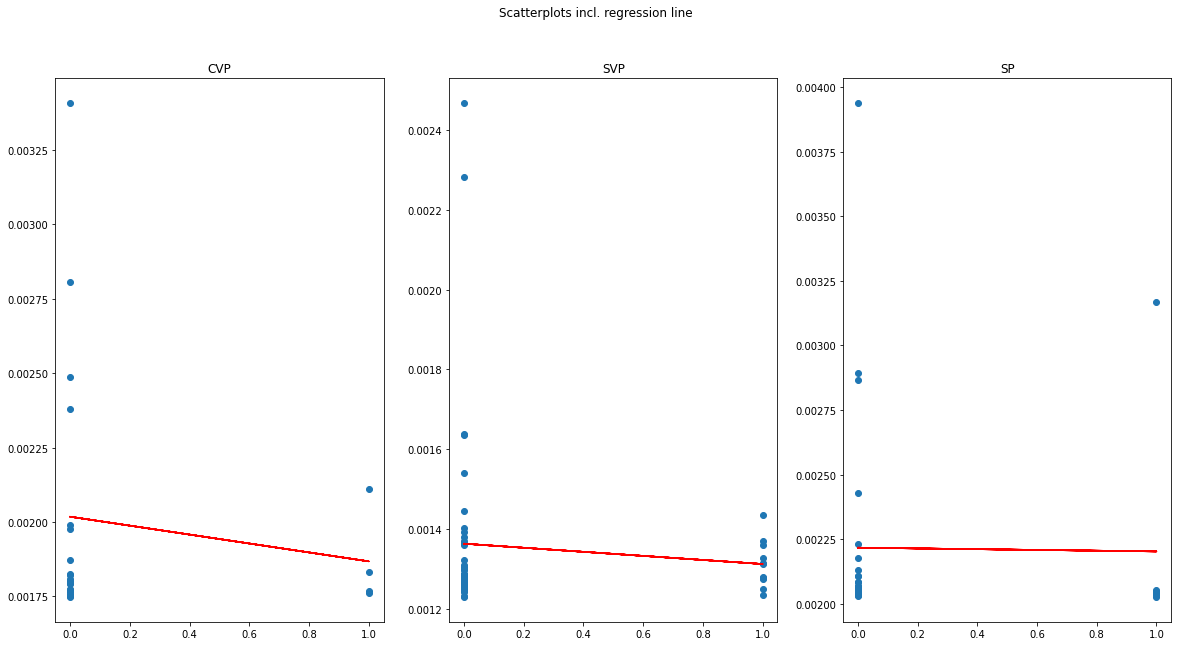

In [305]:
#from IPython.core.pylabtools import figsize
x_cvp = np.array(list(df_correlation_CVP['not_reelected']))
y_cvp = np.array(list(df_correlation_CVP['Closeness_Centrality']))

x_svp = np.array(list(df_correlation_SVP['not_reelected']))
y_svp = np.array(list(df_correlation_SVP['Closeness_Centrality']))

x_sp = np.array(list(df_correlation_SP['not_reelected']))
y_sp = np.array(list(df_correlation_SP['Closeness_Centrality']))

figsize(20,10)

figure = plt.figure(figsize=(20, 2))
figure,(ax1,ax2,ax3) = plt.subplots(1, 3)
figure.suptitle('Scatterplots incl. regression line')

ax1.scatter(x_cvp, y_cvp)
ax1.set_title("CVP")
m, b = np.polyfit(x_cvp,y_cvp,1)
ax1.plot(x,m*x+b, 'red')

ax2.scatter(x_svp, y_svp)
ax2.set_title("SVP")
m, b = np.polyfit(x_svp,y_svp,1)
ax2.plot(x,m*x+b, 'red')

ax3.scatter(x_sp, y_sp)
ax3.set_title("SP")
m, b = np.polyfit(x_sp,y_sp,1)
ax3.plot(x,m*x+b, 'red')

No, p-value is significant at alpha = 0.05. So H0 stands for each party.

=> No Correlation!!!

# Closeness of "Fraktionen"
Hypothesis: The 'right-Fraktion' is statisticaly significant more close to each other, than the 'left-Fraktion'.

In [ ]:
df_closeness_left

,Unnamed: 0,Closeness_Centrality
0,4096,0.002778
1,4097,0.002748
2,4101,0.002762
3,4102,0.002848
4,4106,0.002477
...,...,...
77,4087,0.002838
78,4091,0.002494
79,4093,0.002571
80,4094,0.002883


In [ ]:
df_closeness_right

,Unnamed: 0,Closeness_Centrality
0,4098,0.001680
1,514,0.002448
2,4100,0.001731
3,4103,0.001667
4,4110,0.001756
...,...,...
85,4073,0.001682
86,4077,0.001693
87,4079,0.001843
88,4084,0.001555


In [ ]:
avg_closeness_left = sum(list(df_closeness_left['Closeness_Centrality'])) / len(list(df_closeness_left['Closeness_Centrality']))
avg_closeness_left

0.0028109805276674477

In [ ]:
avg_closeness_right = sum(list(df_closeness_right['Closeness_Centrality'])) / len(list(df_closeness_right['Closeness_Centrality']))
avg_closeness_right

0.001765233751899734

Oh a first surprise. The closeness of the 'right-Fraktion' is in the average allready smaller than the closeness of the 'left-Fraktion'. But let's check if this distance is significant.

For the further step the Hypothesis is changed to: The 'left-Fraktion' is statisticaly significant more close to each other, than the 'right-Fraktion'.

In [258]:
#from numpy import exp
#from scipy.stats import boxcox

data_l = df_closeness_left['Closeness_Centrality']
data_r = df_closeness_right['Closeness_Centrality']
print('Skew before any transformation left: ', data_l.skew())
print('Skew before any transformation right: ', data_r.skew())

print("*"*100)

data_log_l = np.log(data_l)
data_log_r = np.log(data_r)
print('Skew after log-transformation left: ', data_log_l.skew())
print('Skew after log-transformation right: ', data_log_r.skew())


print("*"*100)

data_sqrt_l = np.sqrt(data_l)
print('Skew after sqrt-transformation left: ', data_sqrt_l.skew())
data_sqrt_r = np.sqrt(data_r)
print('Skew after sqrt-transformation right: ', data_sqrt_r.skew())

print("*"*100)

data_box_l = boxcox(data_l)[0]
data_box_l = pd.Series(data_box_l)
print("Skew after boxcox-transformation left: ", data_box_l.skew())
data_box_r = boxcox(data_r)[0]
data_box_r = pd.Series(data_box_r)
print("Skew after boxcox-transformation right: ", data_box_r.skew())

Skew before any transformation left:  2.7392959789964926
Skew before any transformation right:  3.730376958462155
****************************************************************************************************
Skew after log-transformation left:  2.161447152836192
Skew after log-transformation right:  3.2056341404388897
****************************************************************************************************
Skew after sqrt-transformation left:  2.4384631926850298
Skew after sqrt-transformation right:  3.4715462074123065
****************************************************************************************************
Skew after boxcox-transformation left:  0.38144997954989956
Skew after boxcox-transformation right:  0.10924910229244139


Text(0.5, 1.0, 'Boxplot Right')

<Figure size 1440x144 with 0 Axes>

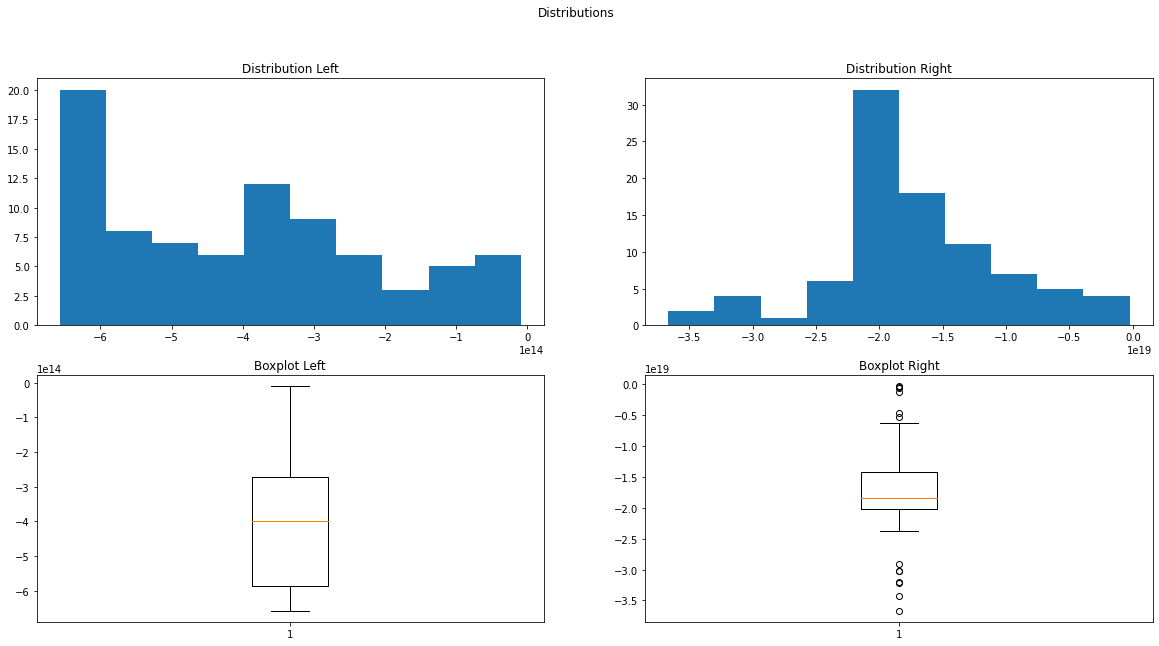

In [324]:
figure = plt.figure(figsize=(20, 2))
figure,axis = plt.subplots(2, 2)
figure.suptitle('Distributions')


axis[0,0].hist(data_box_l)
axis[0,0].set_title("Distribution Left")

axis[0,1].hist(data_box_r)
axis[0,1].set_title("Distribution Right")

axis[1,0].boxplot(data_box_l)
axis[1,0].set_title('Boxplot Left')

axis[1,1].boxplot(data_box_r)
axis[1,1].set_title('Boxplot Right')

In [271]:
scipy.stats.ttest_ind(data_box_l, data_box_r, equal_var=False)

Ttest_indResult(statistic=23.064742917741725, pvalue=2.598059781542028e-39)

H0: left = right
HA: left != right

Highly significant p-value so HA!

ATTENTION:
No normal distribution and not the same variance